### MA5701: Optimización no Lineal

#### Profesor: Jorge Amaya

#### Fecha de entrega: 31/05/2020

#### Integrantes: Sebastián López, Francisco Vásquez, Kurt Walsen

# Tarea 1



In [58]:
import gurobipy as gb

## a)

\begin{align}
\max\ & 150x-\frac{x^{2}}{2}- 20x - 2(x_{1,3}+x_{3,4}+x_{3,6}+x_{5,6}+x_{6,7}+x_{10,11}) \\
s.a & \sum_{j=1}^{11}x_{1,j} - \sum_{i=1}^{11}x_{i,11} = 0\\
\ & \sum_{j=1}^{11}x_{i,j} - \sum_{j=1}^{11}x_{j,i} = 0, \quad \forall i \in [11]\diagdown \{1,11\}\\
\ & (\sum_{i=1}^{11}x_{i,6})(\sum_{i=1}^{11}x_{i,9}) = 0\\
\ & 0 \leq x_{i,j} \leq C_{i,j} \quad \quad \forall (i,j) \in [11]x[11]\\
\end{align}

## b)

In [239]:
def Constructor(name, mode=1):
    model = gb.Model(name)

    #Variables
    var_1_2 = model.addVar(vtype="C",lb=0,ub=100,name='1-2')
    var_1_3 = model.addVar(vtype="C",lb=0,name='1-3')
    var_1_4 = model.addVar(vtype="C",lb=0,ub=100,name='1-4')
    var_2_3 = model.addVar(vtype="C",lb=0,ub=50,name='2-3')
    var_2_5 = model.addVar(vtype="C",lb=0,ub=100,name='2-5')
    var_2_6 = model.addVar(vtype="C",lb=0,ub=100,name='2-6')
    var_3_4 = model.addVar(vtype="C",lb=0,name='3-4')
    var_3_6 = model.addVar(vtype="C",lb=0,name='3-6')
    var_4_6 = model.addVar(vtype="C",lb=0,ub=50,name='4-6')
    var_4_7 = model.addVar(vtype="C",lb=0,ub=50,name='4-7')
    var_5_6 = model.addVar(vtype="C",lb=0,name='5-6')
    var_5_8 = model.addVar(vtype="C",lb=0,ub=100,name='5-8')
    var_6_7 = model.addVar(vtype="C",lb=0,name='6-7')
    var_6_8 = model.addVar(vtype="C",lb=0,ub=80,name='6-8')
    var_6_9 = model.addVar(vtype="C",lb=0,ub=100,name='6-9')
    var_6_10 = model.addVar(vtype="C",lb=0,ub=80,name='6-10')
    var_7_9 = model.addVar(vtype="C",lb=0,ub=80,name='7-9')
    var_7_10 = model.addVar(vtype="C",lb=0,ub=80,name='7-10')
    var_8_9 = model.addVar(vtype="C",lb=0,ub=50,name='8-9')
    var_8_11 = model.addVar(vtype="C",lb=0,ub=80,name='8-11')
    var_9_10 = model.addVar(vtype="C",lb=0,ub=50,name='9-10')
    var_9_11 = model.addVar(vtype="C",lb=0,ub=50,name='9-11')
    var_10_11 = model.addVar(vtype="C",lb=0,name='10-11')

    #Restricciones a los flujos
    model.addConstr(var_1_2 == var_2_3+var_2_5+var_2_6)
    model.addConstr(var_1_3+var_2_3 == var_3_4+var_3_6)
    model.addConstr(var_1_4+var_3_4 == var_4_6+var_4_7)
    model.addConstr(var_2_5 == var_5_6+var_5_8)
    model.addConstr(var_2_6+var_3_6+var_4_6+var_5_6 == var_6_7+var_6_8+var_6_9+var_6_10)
    model.addConstr(var_4_7+var_6_7 == var_7_9+var_7_10)
    model.addConstr(var_5_8+var_6_8 == var_8_9+var_8_11)
    model.addConstr(var_6_9+var_7_9+var_8_9 == var_9_10+var_9_11)
    model.addConstr(var_6_10+var_7_10+var_9_10 == var_10_11)

    #Nodos 6 y 9 no se usan simultaneamente
    model.addConstr((var_2_6+var_3_6+var_4_6+var_5_6)*(var_9_10+var_9_11) == 0)

    #Objetivo
    if mode == 1 or mode == 2:
        model.setObjective((150-mode*20)*(var_8_11+var_9_11+var_10_11) - 
                           (var_8_11+var_9_11+var_10_11)*(var_8_11+var_9_11+var_10_11)/2 - 
                           2*(var_1_3+var_3_4+var_3_6+var_5_6+var_6_7+var_10_11), gb.GRB.MAXIMIZE)
    else:
        raise ValueError('mode can take values 1 or 2')

    model.params.NonConvex = 2
    model.update()
    return model

In [240]:
model_1 = Constructor('Flujos',mode=1)
model_1.optimize()

Changed value of parameter NonConvex to 2
   Prev: -1  Min: -1  Max: 2  Default: -1
Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (win64)
Optimize a model with 9 rows, 23 columns and 40 nonzeros
Model fingerprint: 0x8458517d
Model has 6 quadratic objective terms
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [2e+00, 1e+02]
  QObjective range [1e+00, 2e+00]
  Bounds range     [5e+01, 1e+02]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 2 columns

Continuous model is non-convex -- solving as a MIP.

Found heuristic solution: objective -0.0000000
Presolve added 15 rows and 4 columns
Presolve time: 0.00s
Presolved: 24 rows, 27 columns, 67 nonzeros
Presolved model has 6 quadratic objective terms
Variable types: 19 continuous, 8 integer (8 binary)

Root relaxation: objective 8.450000e+03, 34 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |

In [325]:
vars1 = model_1.getVars()
vars1

[<gurobi.Var 1-2 (value 100.0)>,
 <gurobi.Var 1-3 (value 0.0)>,
 <gurobi.Var 1-4 (value 30.0)>,
 <gurobi.Var 2-3 (value 0.0)>,
 <gurobi.Var 2-5 (value 100.0)>,
 <gurobi.Var 2-6 (value 0.0)>,
 <gurobi.Var 3-4 (value 0.0)>,
 <gurobi.Var 3-6 (value 0.0)>,
 <gurobi.Var 4-6 (value 0.0)>,
 <gurobi.Var 4-7 (value 30.0)>,
 <gurobi.Var 5-6 (value 0.0)>,
 <gurobi.Var 5-8 (value 100.0)>,
 <gurobi.Var 6-7 (value 0.0)>,
 <gurobi.Var 6-8 (value 0.0)>,
 <gurobi.Var 6-9 (value 0.0)>,
 <gurobi.Var 6-10 (value 0.0)>,
 <gurobi.Var 7-9 (value 30.0)>,
 <gurobi.Var 7-10 (value 0.0)>,
 <gurobi.Var 8-9 (value 20.0)>,
 <gurobi.Var 8-11 (value 80.0)>,
 <gurobi.Var 9-10 (value 0.0)>,
 <gurobi.Var 9-11 (value 50.0)>,
 <gurobi.Var 10-11 (value 0.0)>]

## c)

In [242]:
model_2= Constructor('Flujos2',mode=2)
model_2.optimize()

Changed value of parameter NonConvex to 2
   Prev: -1  Min: -1  Max: 2  Default: -1
Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (win64)
Optimize a model with 9 rows, 23 columns and 40 nonzeros
Model fingerprint: 0xf0a896c7
Model has 6 quadratic objective terms
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [2e+00, 1e+02]
  QObjective range [1e+00, 2e+00]
  Bounds range     [5e+01, 1e+02]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 2 columns

Continuous model is non-convex -- solving as a MIP.

Found heuristic solution: objective -0.0000000
Presolve added 15 rows and 4 columns
Presolve time: 0.00s
Presolved: 24 rows, 27 columns, 67 nonzeros
Presolved model has 6 quadratic objective terms
Variable types: 19 continuous, 8 integer (8 binary)

Root relaxation: objective 6.050000e+03, 28 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |

In [243]:
vars2 = model2.getVars()
vars2

[<gurobi.Var 1-2 (value 80.0)>,
 <gurobi.Var 1-3 (value 0.0)>,
 <gurobi.Var 1-4 (value 30.0)>,
 <gurobi.Var 2-3 (value 0.0)>,
 <gurobi.Var 2-5 (value 80.0)>,
 <gurobi.Var 2-6 (value 0.0)>,
 <gurobi.Var 3-4 (value 0.0)>,
 <gurobi.Var 3-6 (value 0.0)>,
 <gurobi.Var 4-6 (value 0.0)>,
 <gurobi.Var 4-7 (value 30.0)>,
 <gurobi.Var 5-6 (value 0.0)>,
 <gurobi.Var 5-8 (value 80.0)>,
 <gurobi.Var 6-7 (value 0.0)>,
 <gurobi.Var 6-8 (value 0.0)>,
 <gurobi.Var 6-9 (value 0.0)>,
 <gurobi.Var 6-10 (value 0.0)>,
 <gurobi.Var 7-9 (value 30.0)>,
 <gurobi.Var 7-10 (value 0.0)>,
 <gurobi.Var 8-9 (value 0.0)>,
 <gurobi.Var 8-11 (value 80.0)>,
 <gurobi.Var 9-10 (value 0.0)>,
 <gurobi.Var 9-11 (value 30.0)>,
 <gurobi.Var 10-11 (value 0.0)>]

In [393]:
# Diccionario de posiciones de los nodos
pos={1: np.array([0,6]),
     2: np.array([3,12]),
     3: np.array([3,6]),
     4: np.array([3,0]),
     5: np.array([7,12]),
     6: np.array([7,6]),
     7: np.array([7,0]),
     8: np.array([11,12]),
     9: np.array([11,6]),
     10: np.array([11,0]),
     11: np.array([14,6])
    }
# Etiquetas de los nodos
node_labels={1: '1',
        2: '2',
        3: '3',
        4: '4',
        5: '5',
        6: '6',
        7: '7',
        8: '8',
        9: '9',
        10:'10',
        11:'11'
       }
def solution_graph(solution_vars,mode):
    '''Dibuja el digrafo de la solución óptima del modelo
    
    Args
    ----
    solution_vars: list(gurobi.Var)
        Lista que contiene las variables óptimas(aristas)
    mode: int = 1,2
        Modelo al que corresponde la solución óptima
    
    Returns
    -------
    None
        Dibuja el digrafo solución del problema.
    
    '''
    # Se importan las librerias a usar
    import networkx as nx
    import matplotlib.pyplot as plt
    
    # Se genera el digrafo y los nodos de 1 a 11
    G = nx.DiGraph()
    G.add_nodes_from(range(1,12))
    
    # Se crea una lista de arcos y diccionario de flujo en éstos 
    edges=[]
    edge_labels={}
    
    # Para cada arista óptima
    for edge in solution_vars:
        # Unpacking de los nodos y el valor del flujo en la arista
        i,j = map(int,edge.varName.split('-'))
        value = int(edge.x)
        
        # Si pasa flujo por la arista
        if value > 0:
            # Se distingue como arista roja (en la solución) 
            G.add_edge(i,j,color='r')
            edges.append((i,j))
            edge_labels[(i,j)] = str(value)+'/'+str(int(edge.ub))
        else:
            # Se deja como arista negra
            G.add_edge(i,j,color='k')
            edges.append((i,j))
    
    # Diccionario de colores para las aristas
    edge_colors = [G[i][j]['color'] for i,j in edges]
    
    # Se crea la figura
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[18,12])
    fig.suptitle('Digrafo solución para modelo {}'.format(mode),
                 fontsize=30
                )
    
    # Se dibuja el digrafo solución
    nx.draw_networkx_nodes(G,pos,node_size=1500,node_color='teal',ax=ax)
    nx.draw_networkx_labels(G,pos,node_labels,font_size=20,ax=ax)
    nx.draw_networkx_edges(G,pos,width=4,arrowsize=40,edge_color=edge_colors,ax=ax)
    nx.draw_networkx_edge_labels(G,pos,edge_labels,font_size=30,font_color='k',label_pos=0.5,ax=ax)
    

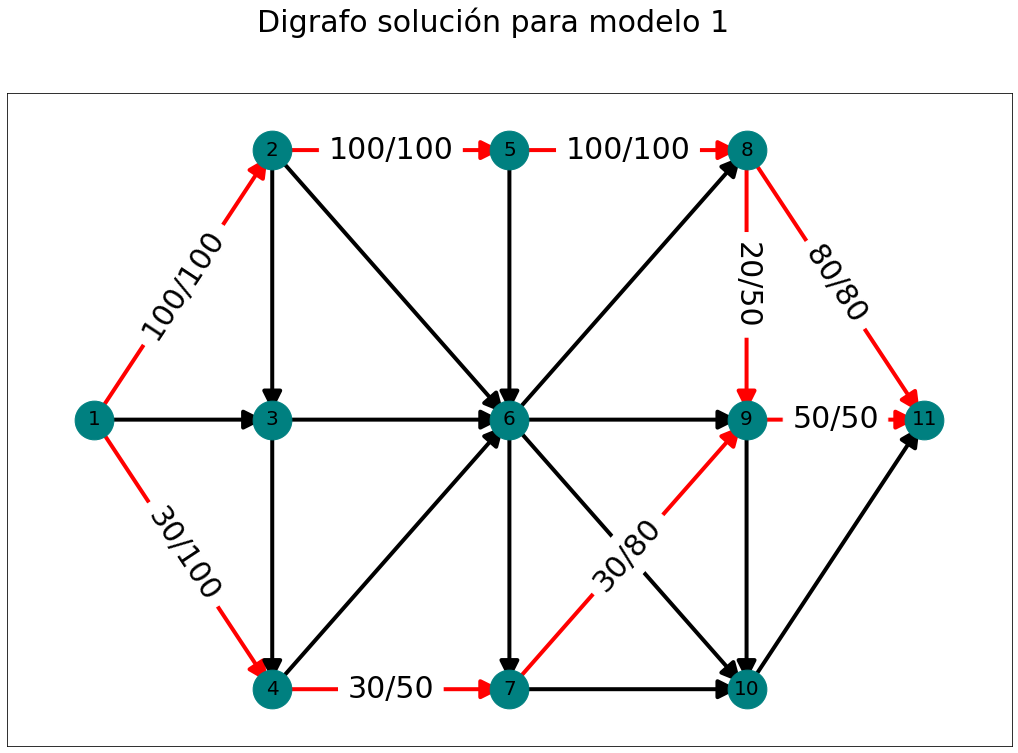

In [394]:
solution_graph(vars1,1) 

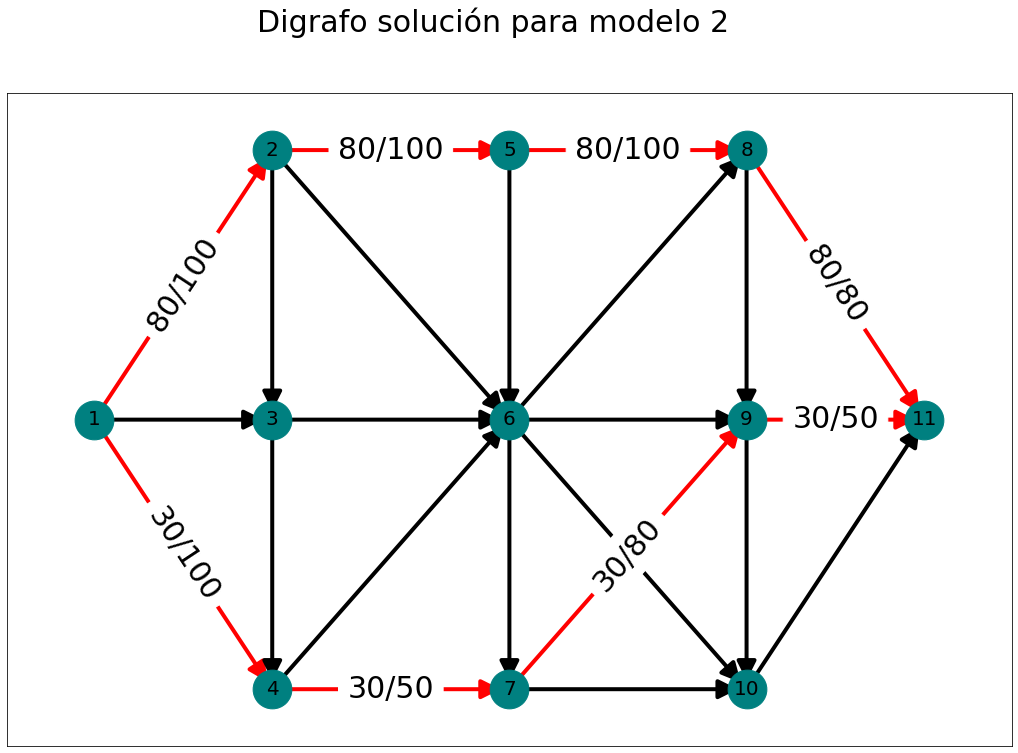

In [395]:
solution_graph(vars2,2) 